In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model.logistic import _logistic_loss
from sklearn import linear_model


In [ ]:
!wget https://raw.githubusercontent.com/cardel/repositorios/main/titanic/train.csv

--2021-02-06 17:59:10--  https://raw.githubusercontent.com/cardel/repositorios/main/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2021-02-06 17:59:10 (4.50 MB/s) - ‘train.csv.3’ saved [61194/61194]



In [ ]:
train = pd.read_csv("train.csv")


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Estamos mirando los valores únicos
pd.unique(train["Pclass"])

array([3, 1, 2])

In [ ]:
#Estamos mirando los valores únicos de la columna sex
pd.unique(train["Sex"])

array(['male', 'female'], dtype=object)

In [ ]:
#Estamos mirando los valores únicos de la columna edad
pd.unique(train["Age"])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
#Dado que encontre que hay personas con edad nula, entonces mir cuantos hay
train["Age"].isna().sum()
#Dado que es una cantidad importante ¿Que hacer?
#Una estrategia es tomar la mediana

177

In [ ]:
train["Age"].mean()

29.69911764705882

In [ ]:
train["Age"]= train["Age"].fillna(train["Age"].mean())

In [ ]:
train["Age"].isna().sum()

0

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Aqui tomo las columnas que me sirven para el problema
train = train[["Pclass","Sex","Age","Survived"]]

In [ ]:
#Este elimina las filas que tengan algun nulo
train = train.dropna()
#Luego eliminamos duplicados
train = train.drop_duplicates()

In [ ]:
trainDataX = train[["Pclass","Sex","Age"]]
trainDataY = train[["Survived"]]


print(trainDataY.head(),"\n",trainDataX.head())

   Survived
0         0
1         1
2         1
3         1
4         0 
    Pclass     Sex   Age
0       3    male  22.0
1       1  female  38.0
2       3  female  26.0
3       1  female  35.0
4       3    male  35.0


In [ ]:
#Trabajar las edades
#Realmente para facilitar encontrar patrones para la RN, es más util usar un rango de edad que una edad en un valor entero

In [ ]:
trainDataX["Age"] = pd.cut(trainDataX["Age"],[0,5,10,15,20,25,30,35,40,45,50,60,70,100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trainDataX.head()

,Pclass,Sex,Age
0,3,male,"(20, 25]"
1,1,female,"(35, 40]"
2,3,female,"(25, 30]"
3,1,female,"(30, 35]"
4,3,male,"(30, 35]"


In [ ]:
trainDataX.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
869    True
871    True
872    True
879    True
889    True
Length: 349, dtype: bool

In [ ]:
trainDataX.loc[:,"Sex"],categoriaSex=pd.factorize(trainDataX["Sex"], sort=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
categoriaSex

Index(['female', 'male'], dtype='object')

In [ ]:
trainDataX.loc[:,"Age"],categoriAge=pd.factorize(trainDataX["Age"], sort=True)
categoriAge

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


CategoricalIndex([   (0, 5],   (5, 10],  (10, 15],  (15, 20],  (20, 25],
                   (25, 30],  (30, 35],  (35, 40],  (40, 45],  (45, 50],
                   (50, 60],  (60, 70], (70, 100]],
                 categories=[(0, 5], (5, 10], (10, 15], (15, 20], (20, 25], (25, 30], (30, 35], (35, 40], ...], ordered=True, dtype='category')

In [ ]:
trainDataX.head()

,Pclass,Sex,Age
0,3,1,4
1,1,0,7
2,3,0,5
3,1,0,6
4,3,1,6


In [ ]:
#Vamos a normalizar los datos
scaler = StandardScaler()
scaler.fit(trainDataX)
print(scaler.mean_)

[2.10601719 0.57879656 5.61604585]


In [ ]:
trainDataX = scaler.transform(trainDataX)
trainDataX

array([[ 1.05399391,  0.85306669, -0.52581933],
       [-1.30397964, -1.1722413 ,  0.45030272],
       [ 1.05399391, -1.1722413 , -0.20044531],
       ...,
       [-1.30397964,  0.85306669,  0.12492871],
       [-1.30397964, -1.1722413 ,  1.42642478],
       [-1.30397964,  0.85306669, -0.20044531]])

In [ ]:
pca = PCA(n_components=3)
pca.fit(trainDataX)
print(pca.explained_variance_ratio_)

[0.45231105 0.32911152 0.21857743]


In [ ]:
print(trainDataX,trainDataY)

[[ 1.05399391  0.85306669 -0.52581933]
 [-1.30397964 -1.1722413   0.45030272]
 [ 1.05399391 -1.1722413  -0.20044531]
 ...
 [-1.30397964  0.85306669  0.12492871]
 [-1.30397964 -1.1722413   1.42642478]
 [-1.30397964  0.85306669 -0.20044531]]      Survived
0           0
1           1
2           1
3           1
4           0
..        ...
869         1
871         1
872         0
879         1
889         1

[349 rows x 1 columns]


In [ ]:
trainDataY= trainDataY.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(trainDataX,trainDataY, test_size=0.3)

In [ ]:
print(X_train[0:10],X_test[0:10],y_train[0:10],y_test[0:10])

[[ 1.05399391  0.85306669 -0.52581933]
 [-0.12499287 -1.1722413  -0.85119335]
 [ 1.05399391  0.85306669 -0.52581933]
 [ 1.05399391 -1.1722413  -0.20044531]
 [ 1.05399391  0.85306669 -0.52581933]
 [-1.30397964  0.85306669 -1.8273154 ]
 [ 1.05399391  0.85306669 -1.8273154 ]
 [-1.30397964 -1.1722413   0.45030272]
 [-0.12499287 -1.1722413  -0.20044531]
 [-1.30397964  0.85306669 -0.52581933]] [[-0.12499287 -1.1722413  -1.8273154 ]
 [ 1.05399391 -1.1722413   0.12492871]
 [ 1.05399391  0.85306669 -0.20044531]
 [-1.30397964  0.85306669  1.10105076]
 [-0.12499287  0.85306669 -0.52581933]
 [-0.12499287 -1.1722413   0.77567674]
 [-0.12499287 -1.1722413  -0.52581933]
 [-0.12499287  0.85306669  1.10105076]
 [-0.12499287  0.85306669  0.45030272]
 [-1.30397964  0.85306669  1.42642478]] [[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]] [[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))

def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def escalon(x):
  if x < 0.5:
    return 0
  else:
    return 1

def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2,tendenciasCO2, pesosCS, tendenciasCS):
  entradaNetaC1 = np.dot(pesosCO1,np.transpose(entrada))-tendenciasC01
  salidaC1 = sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2 = sigmoide(entradaNetaC2)

  entradaNetaCS = np.dot(pesosCS,salidaC2)-tendenciasCS
  salida = sigmoide(entradaNetaCS)

  return salida,entradaNetaCS,entradaNetaC2,entradaNetaC1

# El algoritmor recibe
# factorAprendizaje: Que tanto se permite el cambio en los pesos w(t) = e*error*f'(neta)*xj
# error: Un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar
# salidas: salidas esperadas
# max-it: Número de iteraciones que permitimos
# alpha: El valor de incremento del factor de aprendizaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: #número de neuronas en la capa oculta 1
# neuronasC2: #número de neuronas en la capa oculta 2
def backpropagation(entradas,salidas,factorApredizaje,error,max_it,alpha,rho, neuronasC1, neuronasC2):
  # Calculamos los pesos de la capa oculta 1
  # Tiene 3 neuronas y como son tres entradas tenemos una matriz 3x3
  pesosCO1 = 2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1 = 2*np.random.rand(neuronasC1)-1
  # Pesos capa oculta 2
  # La capa oculta 2 tiene 2 neuronas y recibe las salidas de 3 neuronas en la capa oculta 1
  # Generar una matriz 2x3
  pesosCO2 = 2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2 = 2*np.random.rand(neuronasC2)-1
  #Generamos los pesos de la capa de salida, 1 salida (1 neurona) y tenemos 2 entradas que vienen de la capa oculta 2
  pesosCS = 2*np.random.rand(neuronasC2)-1
  tendenciasCS = 2*np.random.rand(1)-1
  it = 0
  errorVec = []
  errorAnt = float('inf') 
  while(it<max_it):
    it+=1
    errorIt = 0
    for i in range(0, entradas.shape[0]):
      ent = entradas[i]
      t = salidas[i]
      y,entradaNetaCS, entradaNetaC2, entradaNetaC1  = neurona(ent,pesosCO1,tendenciasC1,pesosCO2,tendenciasC2,pesosCS,tendenciasCS)

      errorIt += np.power(t-y,2)/2.0

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent = entradas[i]
      t = salidas[i]
      y,entradaNetaCS, entradaNetaC2, entradaNetaC1  = neurona(ent,pesosCO1,tendenciasC1,pesosCO2,tendenciasC2,pesosCS,tendenciasCS)

      #Calcular el error en la capa salida

      errorCS = (t-y)*derivada(entradaNetaCS)

      #Calcular el error capa oculta 2

      errorC2 = 0
      for j in range(0,pesosCS.shape[0]):
        errorC2 += pesosCS[j]*errorCS*derivada(entradaNetaC2[j])

     #Calcular el error de la capa oculta 1
      errorC1 = 0
      for j in range(0,pesosCO2.shape[0]):
        for k in range(0,pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])

      #Actualizar pesos
      #Capa salida
      for j in range(0,pesosCS.shape[0]):
        pesosCS[j] += factorApredizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j] += factorApredizaje*errorCS*(-1)

      #Pesos capa oculta 02
      for j in range(0,pesosCO2.shape[0]):  #neurona de la CO2
        for k in range(0,pesosCO2.shape[1]):  # salida de la CO1
          pesosCO2[j][k] += factorAprendizaje*errorC2*entradaNetaC2[j]

      #Actualizar las tendencias O2
      for j in range(0,tendenciasC2.shape[0]):
        tendenciasC2[j] += factorApredizaje*errorC2*(-1)

      #Pesos capa oculta 1
      for j in range(0,pesosCO1.shape[0]):
        for k in range(0,pesosCO1.shape[1]):
          pesosCO1[j][k] += factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j] += factorApredizaje*errorC1*(-1)

    if errorIt<errorAnt:
      factorApredizaje *= alpha
    else:
      factorApredizaje *= rho
    errorAnt = errorIt

  return pesosCS, pesosCO1, pesosCO2,tendenciasC1,tendenciasC2, tendenciasCS, errorVec

In [ ]:
#parametros
neuronasC1 = 3
neuronasC2 = 7  #2n+1  Regla de Kolmogorov
factorAprendizaje = 0.5
alpha = 1.05 #Aumentar el factor de aprendizaje
rho = 0.95 #Disminuir el factor
max_it = 200
error = 0.5

In [ ]:
#X_train,X_test,y_train,y_test
pesosCS, pesosCO1, pesosCO2,tc1,tc2,tcs,errorVec=backpropagation(X_train,y_train,factorAprendizaje,error,max_it,alpha,rho, neuronasC1, neuronasC2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 1.0, 'Error de entrenamiento')

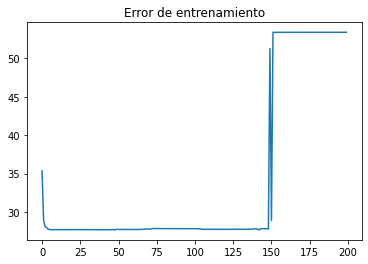

In [ ]:
plt.plot(errorVec)
plt.title("Error de entrenamiento")

In [ ]:
def errorRNN(X,t):
  error = 0
  emc = 0
  for i in range(0,X.shape[0]):
    xi = X[i]
    ti = t[i]
    y,entradaNetaCS, entradaNetaC2, entradaNetaC1 = neurona(xi,pesosCO1, tc1,pesosCO2,tc2,pesosCS,tcs)

    emc += pow((ti-y),2)/2
    if int(round(y[0],0)) != ti:
      error+=1


  error = (error / X.shape[0])*100
  
  return error, emc

In [ ]:
error,emc = errorRNN(X_test,y_test)
print(error,emc)

50.476190476190474 [24.09928636]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
 clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(neuronasC1, neuronasC2), random_state=1)
 
 clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.score(X_test, y_test)

0.7047619047619048

In [ ]:
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(clf, X_train, y_train, "alpha",np.logspace(-7, 3, 3))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dis

In [ ]:
train_scores, valid_scores

(array([[0.78461538, 0.75384615, 0.76410256, 0.73333333, 0.74489796],
        [0.74871795, 0.75384615, 0.75897436, 0.74358974, 0.75      ],
        [0.51794872, 0.51794872, 0.52307692, 0.52307692, 0.52040816]]),
 array([[0.65306122, 0.6122449 , 0.69387755, 0.67346939, 0.66666667],
        [0.65306122, 0.6122449 , 0.63265306, 0.75510204, 0.70833333],
        [0.53061224, 0.53061224, 0.51020408, 0.51020408, 0.52083333]]))

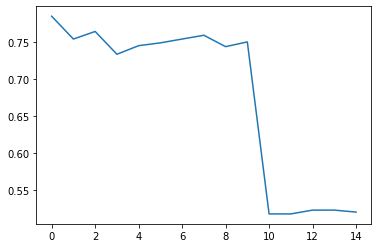

In [ ]:
scores = train_scores.reshape(15)
plt.plot(scores)

In [ ]:
train_scores

array([[0.78461538, 0.75384615, 0.76410256, 0.73333333, 0.74489796],
       [0.74871795, 0.75384615, 0.75897436, 0.74358974, 0.75      ],
       [0.51794872, 0.51794872, 0.52307692, 0.52307692, 0.52040816]])